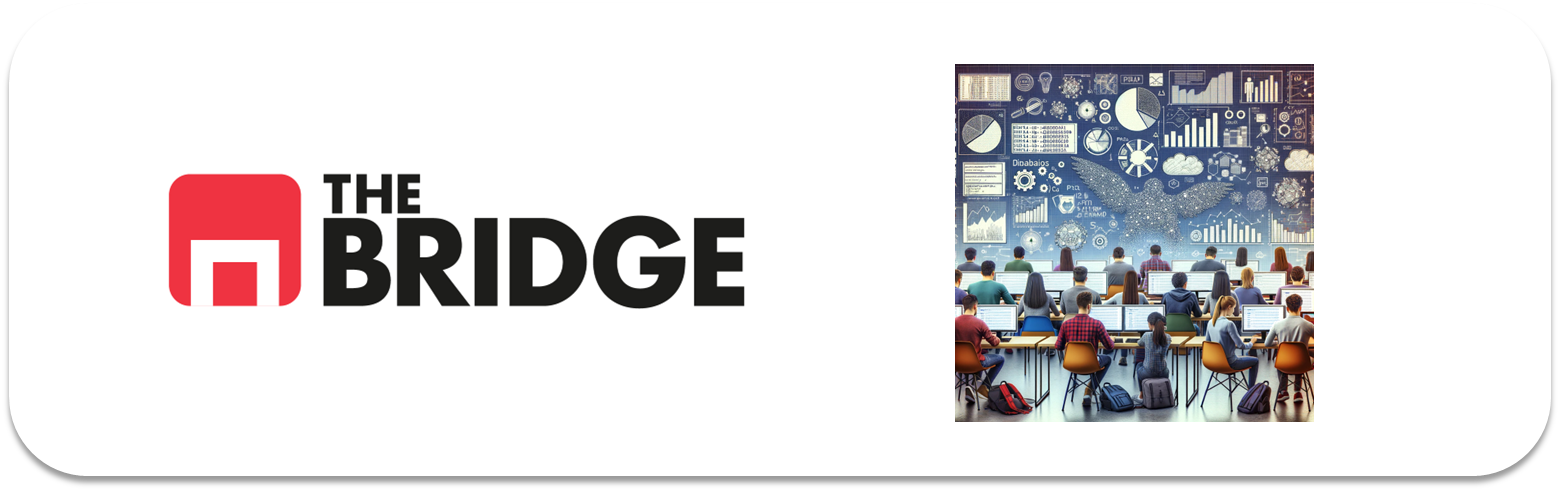

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [247]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [248]:
# 1. Cargar el dataset del Titanic

df_titanic = pd.read_csv("./data/titanic.csv")

In [249]:
# 2. Deshazte de las variables que no vayas a usar

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [250]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [251]:
df_titanic.drop(["deck", "embark_town", "alive"], axis = 1, inplace = True)
df_titanic.dropna(inplace = True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    712 non-null    int64  
 1   pclass      712 non-null    int64  
 2   sex         712 non-null    object 
 3   age         712 non-null    float64
 4   sibsp       712 non-null    int64  
 5   parch       712 non-null    int64  
 6   fare        712 non-null    float64
 7   embarked    712 non-null    object 
 8   class       712 non-null    object 
 9   who         712 non-null    object 
 10  adult_male  712 non-null    bool   
 11  alone       712 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 62.6+ KB


In [252]:
# 3. Escoge y analiza la variable target de forma gráfica

df_titanic["survived"].value_counts(True)

survived
0    0.595506
1    0.404494
Name: proportion, dtype: float64

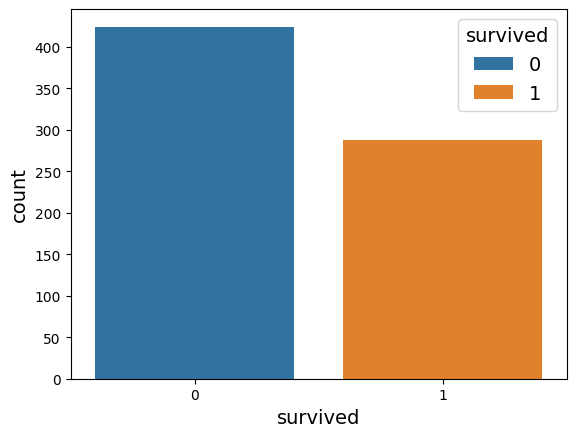

In [253]:
sns.countplot(x = "survived", data = df_titanic, hue = "survived");

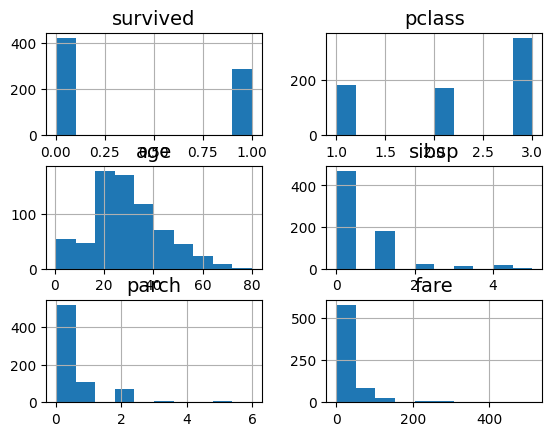

In [254]:
df_titanic.hist();

In [255]:
# 4. Haz el split en train y test

train_set, test_set = train_test_split(df_titanic, test_size = 0.2, stratify = df_titanic["survived"], random_state = 42)

In [256]:
# 5. Construye las parejas X, y de train y test

X = df_titanic.drop("survived", axis = 1)
y = df_titanic["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = df_titanic["survived"], random_state = 42)

In [257]:
# 6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test

numeric_features = X_train.select_dtypes(include = [np.number]).columns
categorical_features = X_train.select_dtypes(include = ['object']).columns

numeric_imputer = SimpleImputer(strategy = "mean")
categorical_imputer = SimpleImputer(strategy = "most_frequent")

X_train_numeric_imputed = numeric_imputer.fit_transform(X_train[numeric_features])
X_train_categorical_imputed = categorical_imputer.fit_transform(X_train[categorical_features])

X_test_numeric_imputed = numeric_imputer.transform(X_test[numeric_features])
X_test_categorical_imputed = categorical_imputer.transform(X_test[categorical_features])

X_train_imputed = np.concatenate((X_train_numeric_imputed, X_train_categorical_imputed), axis = 1)
X_test_imputed = np.concatenate((X_test_numeric_imputed, X_test_categorical_imputed), axis = 1)

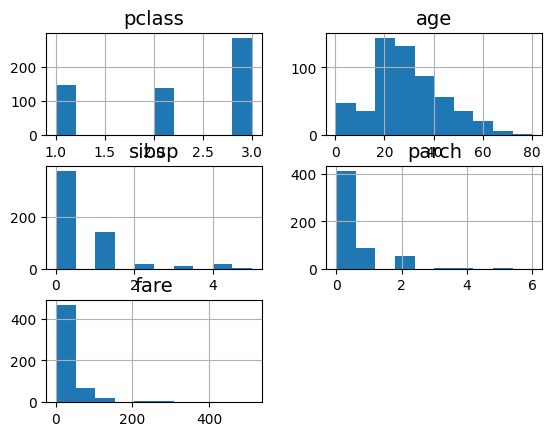

In [258]:
# 7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué

train_set.drop("survived", axis = 1).hist()
plt.show()

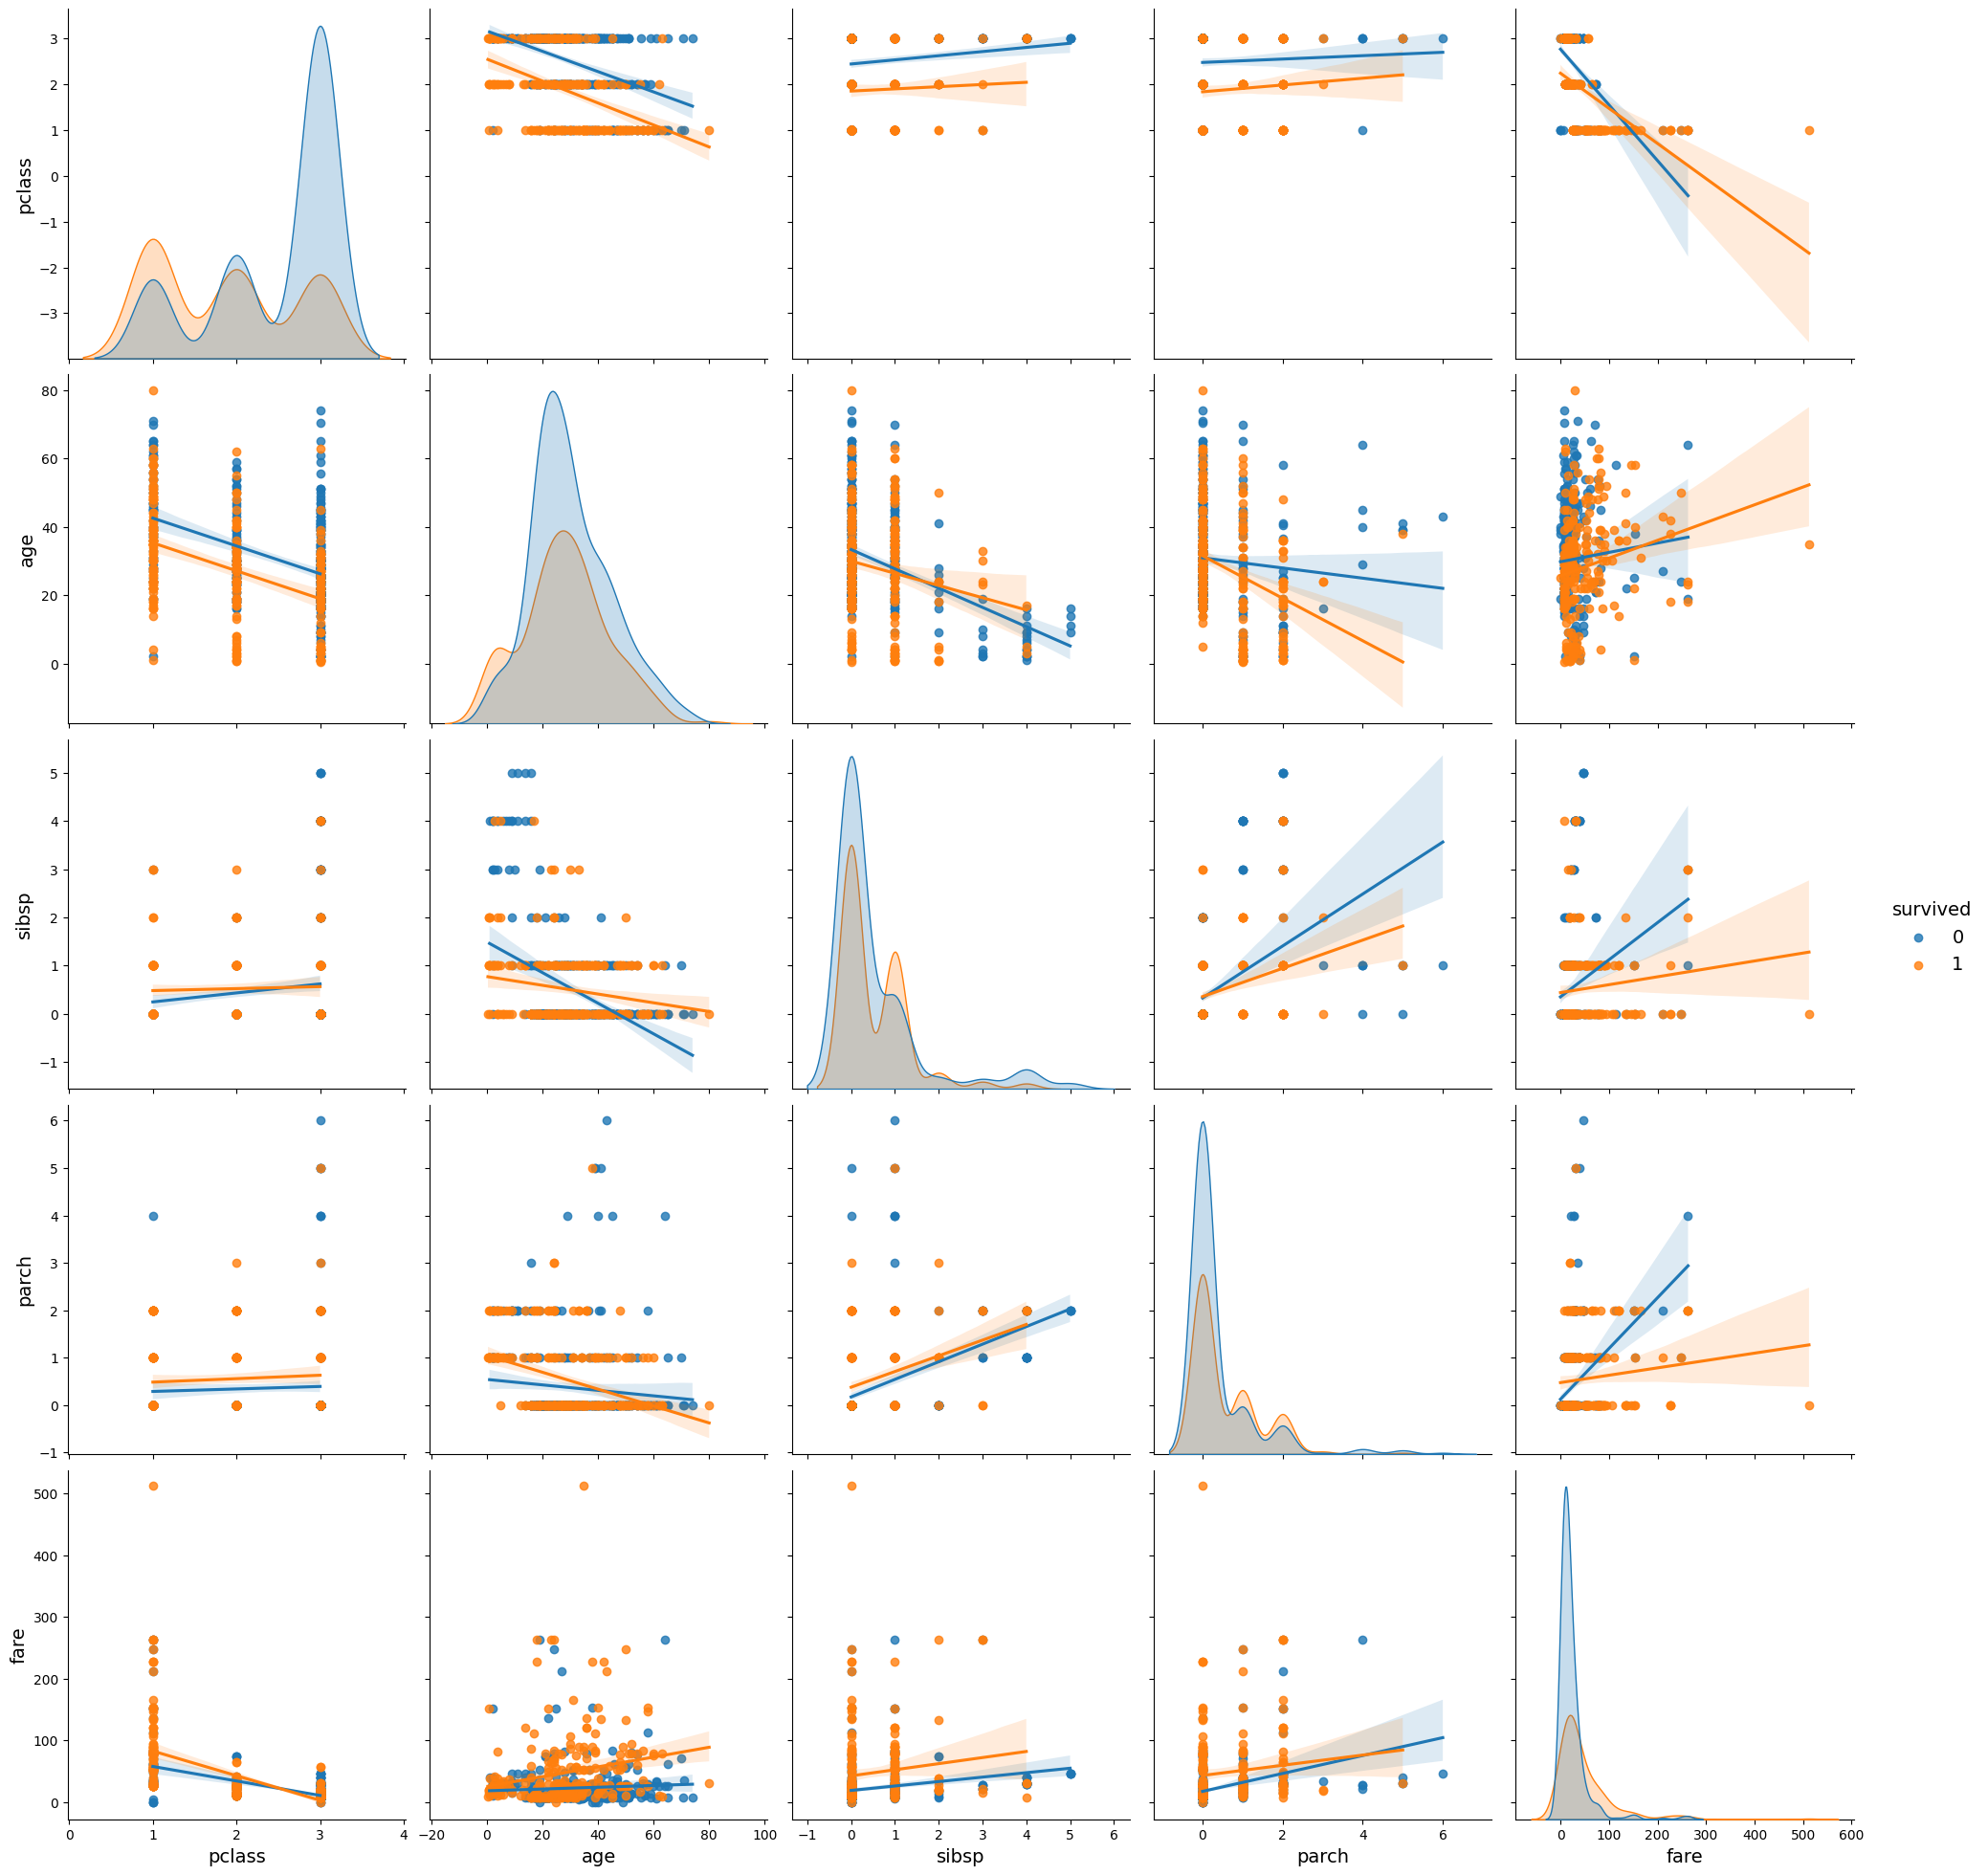

In [259]:
sns.pairplot(train_set,
            hue = "survived",
            height = 4,
            vars = ["pclass", "age", "sibsp", "parch", "fare"],
            kind = "reg");

In [260]:
features = train_set.drop("survived", axis = 1).columns.to_list()
print(features)

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'alone']


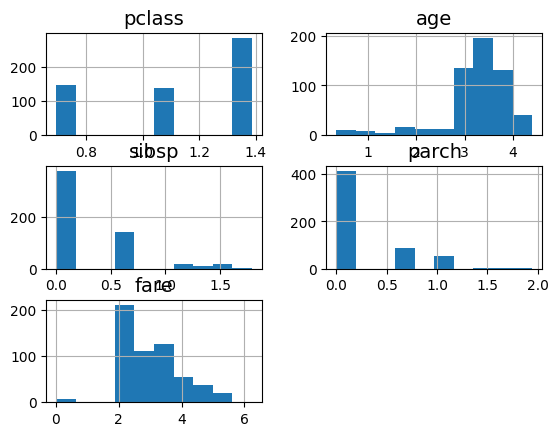

In [261]:
# 8. Trata las variables para que funcionen lo mejor posible en el modelo

for col in features:
    if train_set[col].dtype in ["int64", "float64"]:
        train_set[col] = np.log(train_set[col] + 1)
train_set[features].hist();

In [262]:
features_num = train_set.select_dtypes(include = ["int64", "float64"]).columns

scaler = StandardScaler()
scaler.fit(train_set[features_num])
X_train = pd.DataFrame(scaler.transform(train_set[features_num]), columns = features_num)
X_test = pd.DataFrame(scaler.transform(test_set[features_num]), columns = features_num)
X_train.describe()

,survived,pclass,age,sibsp,parch,fare
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,2.341419e-17,5.307217e-17,4.058460e-17,-2.965798e-17,2.169715e-16,1.451680e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-8.236905e-01,-1.555514e+00,-4.131226e+00,-6.445364e-01,-5.759959e-01,-3.237632e+00
25%,-8.236905e-01,-1.555514e+00,-2.837579e-01,-6.445364e-01,-5.759959e-01,-8.723750e-01
50%,-8.236905e-01,8.645774e-01,1.772377e-01,-6.445364e-01,-5.759959e-01,-2.118601e-01
75%,1.214048e+00,8.645774e-01,6.365342e-01,8.787473e-01,1.025808e+00,4.966866e-01
max,1.214048e+00,8.645774e-01,1.644252e+00,3.293095e+00,3.920837e+00,3.463661e+00


In [263]:
# 9. Construye un modelo de regresión logística

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [264]:
# 10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features

print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[ 4.60889315 -0.2739637  -0.19809969 -0.07108277  0.04507748  0.16248933]]
[-1.12106993]
[0 1]


In [265]:
intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns = ["coefficient"]).copy()
features["coefficient"] = np.abs(features["coefficient"])

features.sort_values("coefficient", ascending = False).head()

,coefficient
survived,4.608893
pclass,0.273964
age,0.198100
fare,0.162489
sibsp,0.071083


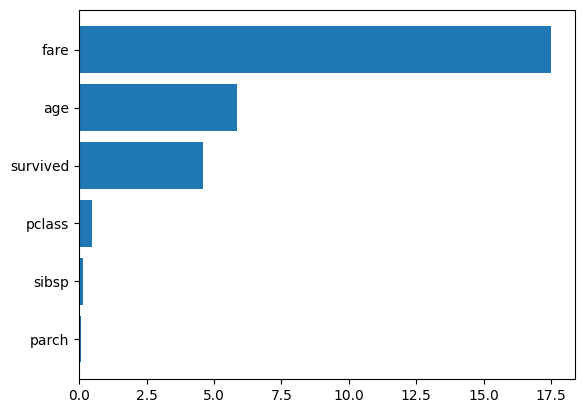

In [266]:
stdevs = []
for i in X_train.columns:
    stdev = df_titanic[i].std()
    stdevs.append(stdev)

features["stdev"] = np.array(stdevs).reshape(-1, 1)
features["importance"] = features["coefficient"] * features["stdev"]
features["importance_standarized"] = features["importance"] / y_train.std()

features = features.sort_values("importance_standarized", ascending = True)
plt.barh(features.index, features.importance_standarized);

In [267]:
# 11. Procesa el dataset de test para que puedas usarlo en la evaluación 

name = "Logistic Regression"
cv_results = model_selection.cross_val_score(log_reg, X_train, y_train, cv = 5, scoring = "accuracy")

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[1. 1. 1. 1. 1.]
Logistic Regression: 1.000000 (0.000000)


In [268]:
# 12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad

y_proba = log_reg.predict_proba(X_test)
y_pred = log_reg.predict(X_test)

In [269]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [f"Real {i}" for i in log_reg.classes_], 
                  columns = [f"Predicho {i}" for i in log_reg.classes_])

cm

,Predicho 0,Predicho 1
Real 0,80,5
Real 1,25,33


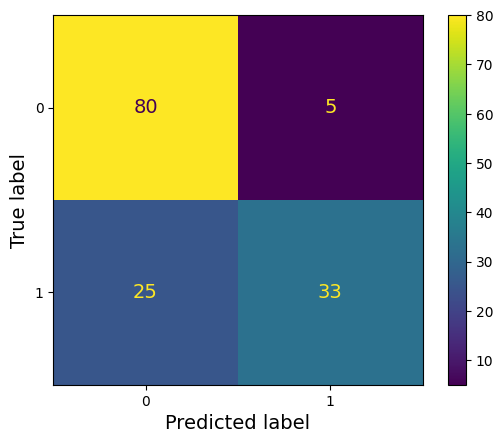

In [270]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

c:\Users\albam\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


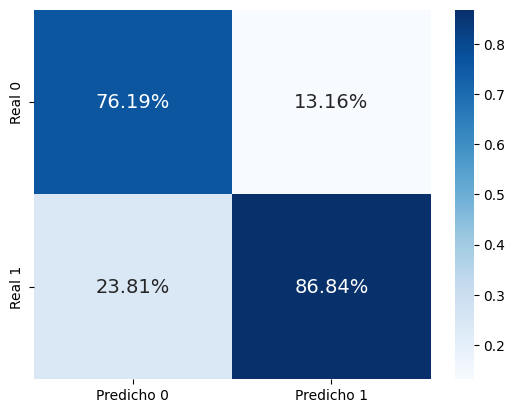

In [271]:
sns.heatmap(cm/np.sum(cm), annot = True, 
            fmt = ".2%", cmap = "Blues");

In [272]:
micro_prec = precision_score(y_test, y_pred, average = "micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average = "macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average = "micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average = "macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.7902097902097902
MACRO PRECISION: 0.8151629072681704
MICRO RECALL: 0.7902097902097902
MACRO RECALL: 0.7550709939148073
MICRO ACCURACY: 0.7902097902097902


In [273]:
acierto = accuracy_score(y_test, y_pred)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 79.02 %
Error: 20.98 %


In [274]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        85
           1       0.87      0.57      0.69        58

    accuracy                           0.79       143
   macro avg       0.82      0.76      0.76       143
weighted avg       0.81      0.79      0.78       143



AUROC: 0.94


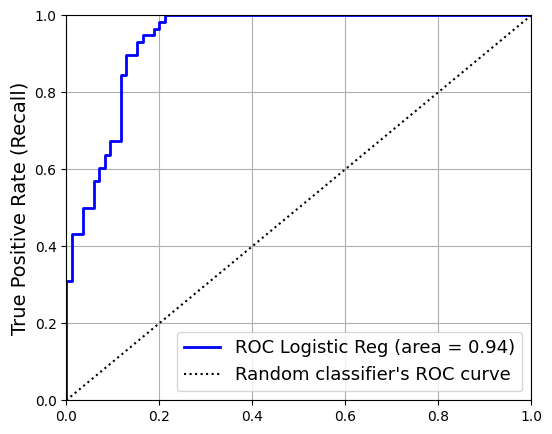

In [275]:
scores = log_reg.predict_proba(X_test)
y_proba = scores[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth = 2, color = "blue", label = f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label = "Random classifier's ROC curve")
plt.ylabel("True Positive Rate (Recall)")
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc = "lower right", fontsize = 13);